In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('climate_action_data.csv')
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1056,2025-02-26,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2056
freq,2,2,5,11,13,8,203,8,11,2


In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df.replace('error', np.nan, inplace=True)
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [7]:
numeric_columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())

# Replace NaN with median for each numeric column
for col in numeric_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

df[numeric_columns].isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      802 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               797 non-null    float64
 3   Soil_pH                        797 non-null    float64
 4   Temperature(C)                 797 non-null    float64
 5   Humidity(%)                    797 non-null    float64
 6   Crop_Type                      798 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  797 non-null    float64
 8   Irrigation_Recommended(mm)     797 non-null    float64
 9   Drone_Image_ID                 802 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.9+ KB
None


C:\Users\mable\AppData\Local\Temp\ipykernel_20160\3604751745.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\mable\AppData\Local\Temp\ipykernel_20160\3604751745.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
dtype: int64

       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        802.000000  802.000000      802.000000   802.000000   
mean          44.767756    6.248865       26.461471    60.034539   
std           20.460731    1.021573        4.863302    17.416023   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.330000       22.300000    46.025000   
50%           45.410000    6.260000       26.600000    59.600000   
75%           62.555000    7.080000       30.600000    75.275000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     802.000000                  802.000000  
mean                       87.456983                   17.392269  
std                        34.765654                    7.140127  
min                        30.000000                    5.000000  
25%                        57.925000                

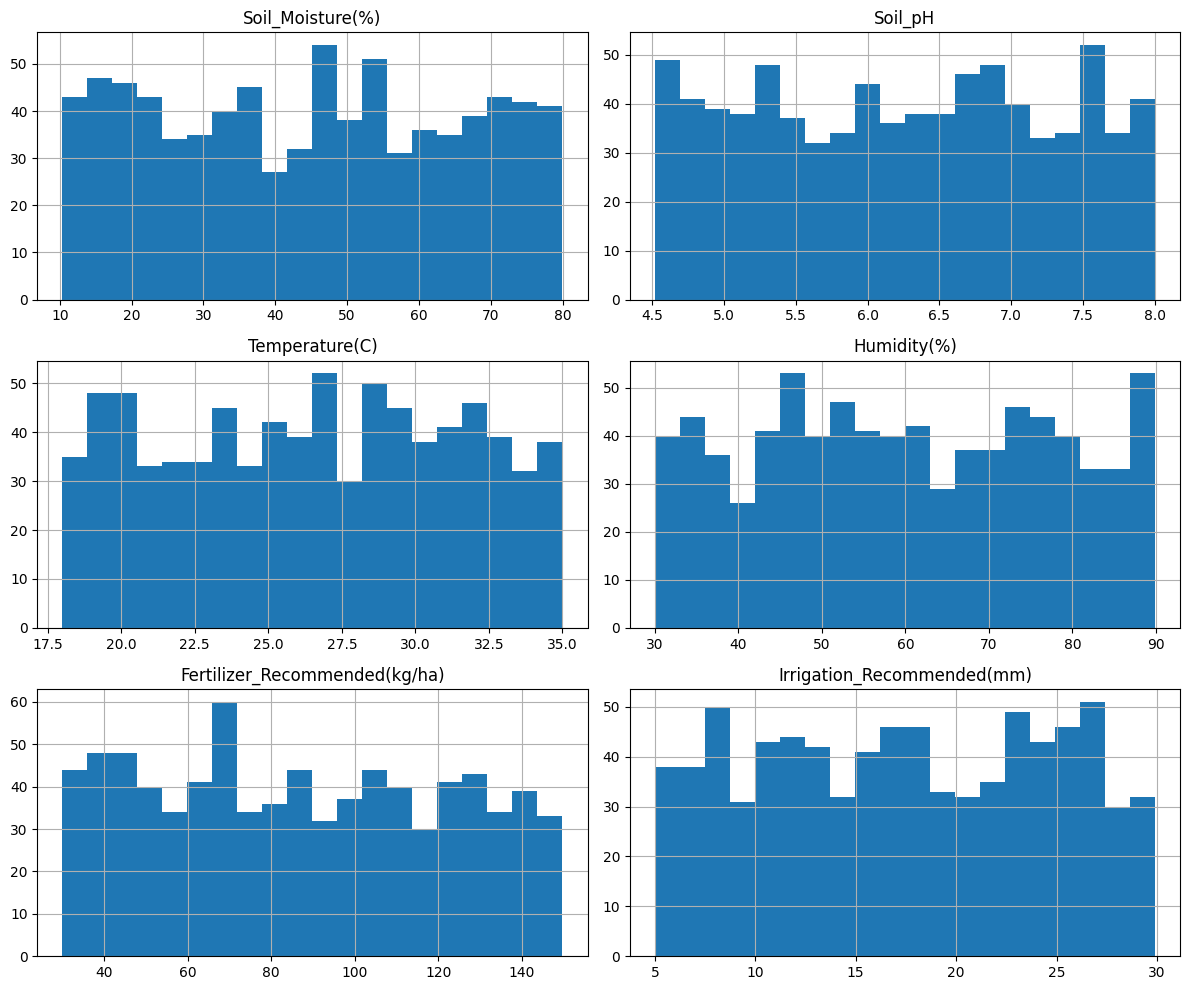

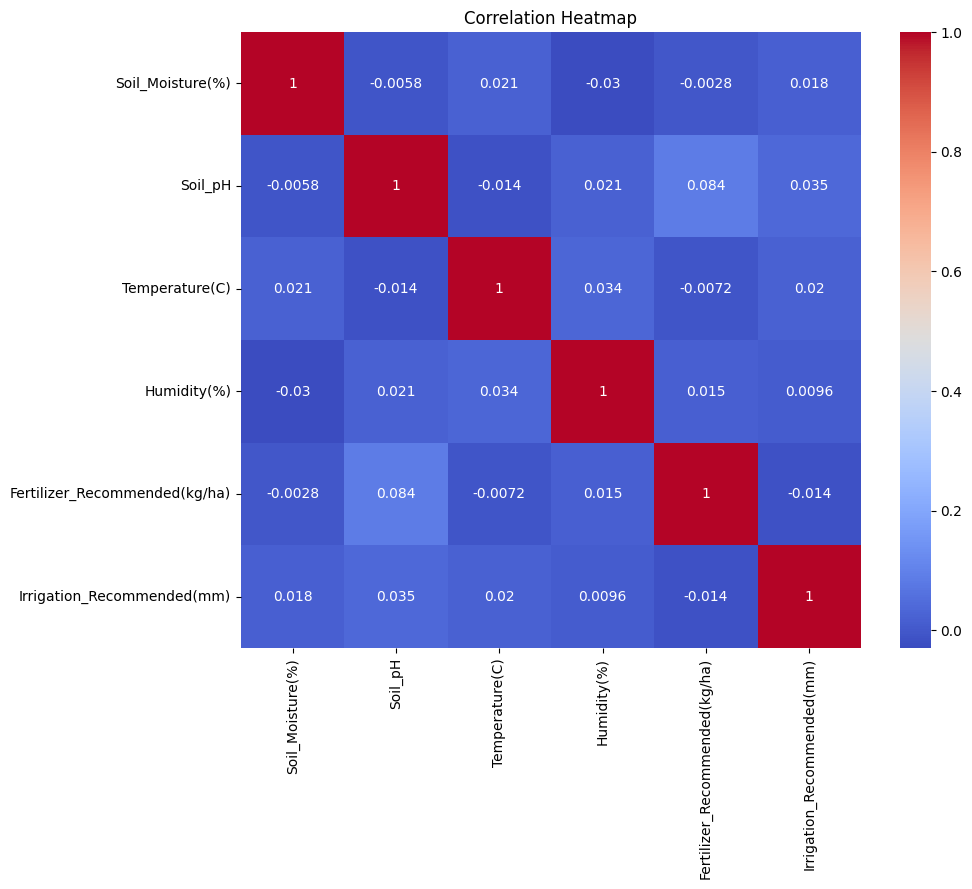

In [8]:
#Descriptive Statistics

print(df.describe())

#Histograms for Numeric Variables

df[numeric_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      802 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               802 non-null    float64
 3   Soil_pH                        802 non-null    float64
 4   Temperature(C)                 802 non-null    float64
 5   Humidity(%)                    802 non-null    float64
 6   Crop_Type                      798 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  802 non-null    float64
 8   Irrigation_Recommended(mm)     802 non-null    float64
 9   Drone_Image_ID                 802 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.9+ KB
None
Variables most influencing fertilizer recommendations:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                  

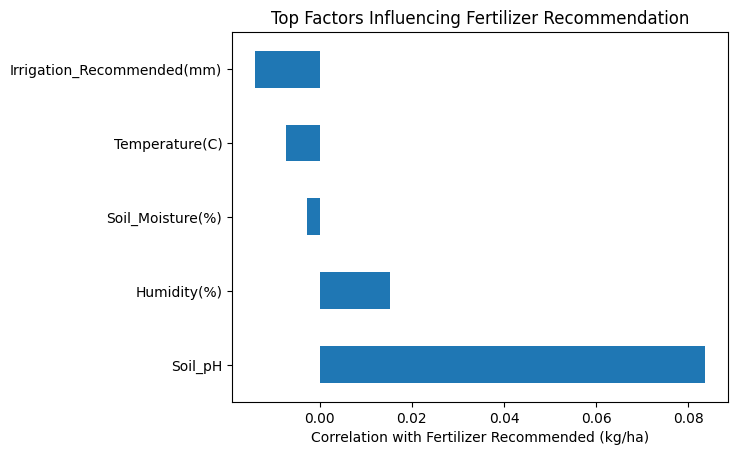

Crop with highest average soil moisture:
Crop_Type
Wheat    47.185349
Name: Soil_Moisture(%), dtype: float64
Crops experiencing average temperatures above 30°C:
Crop_Type
Beans       32.311538
Lettuce     32.575676
Maize       32.430909
Tomatoes    32.404348
Wheat       32.528571
Name: Temperature(C), dtype: float64


In [18]:
# Variables Most Influencing Fertilizer Recommendations

print(df.info())
if 'Fertilizer_Recommended(kg/ha)' in df.columns:
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Compute correlations with Fertilizer_Recommended
    corr_with_fertilizer = numeric_df.corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
    
    # Display the result
    print("Variables most influencing fertilizer recommendations:")
    print(corr_with_fertilizer)
else:
    print("Fertilizer_Recommended(kg/ha) column not found.")

# Top 5 influencing factors (excluding Fertilizer itself)
corr_with_fertilizer.drop('Fertilizer_Recommended(kg/ha)').head(5).plot(kind='barh')
plt.xlabel('Correlation with Fertilizer Recommended (kg/ha)')
plt.title('Top Factors Influencing Fertilizer Recommendation')
plt.show()


# Crop Type with Highest Average Soil Moisture
if 'Crop_Type' in df.columns and 'Soil_Moisture(%)' in df.columns:
    avg_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
    print("Crop with highest average soil moisture:")
    print(avg_moisture.head(1))

# Irrigation Adjustment for Crops with Average Temperatures > 30°C
if 'Temperature(C)' in df.columns and 'Crop_Type' in df.columns:
    high_temp_crops = df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Temperature(C)'].mean()
    print("Crops experiencing average temperatures above 30°C:")
    print(high_temp_crops)


In [19]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("Cleaned data exported successfully.")

Cleaned data exported successfully.
